# Deep sequence modeling

In [16]:
from __future__ import print_function
import tensorflow as tf
import os, json, re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
%matplotlib inline

# Deal with sequential data

The different units into which you can break down text (words, characters) are called tokens; then if you apply a tokenization scheme, you associate numeric vectors with the generated tokens.<br>
These vectors, packed into sequence tensors, are fed into Deep Neural Network.<br>
There are multiple ways to associate a vector with a token: we will see One-Hot Encoding and Token Embedding.<br>
In this section we are going to deal with:
* 3.1.1 One-Hot Encoding
* 3.1.2 Word embedding

## One-Hot Encoding

In [17]:
# define 4 documents
docs = ['Well done!','Good work','Great effort','nice work']

# create the tokenizer
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)


encoded_docs = tokenizer.texts_to_matrix(docs, mode='count')
print(encoded_docs)

# possible problems are related to the sparsity of the solution.

[[0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]]


## 4.1.2 Word embedding

There are two ways to obtain word embeddings:<br>
* May be learned jointly with the network
* May use pre-trained word vectors (Word2Vec, GloVe,..)


Word embeddings maps human language into a geometric space; in a reasonable embedding space synonyms are embedded into similar word vectors and the geometric distance between any two word vectors reflects the semantic distance between the associated words (words meaning different things are embedded at points far away from each other, whereas related words are closer).<br>
How good is a word-embedding space depends on the specific task.<br>
It is reasonable to learn a new embedding space with every new task: with backpropagation and Keras it reduces to learn the weights of the Embedding layer.

### Learning Word Embeddings with the embedding layer
#### Load imdb dataset
This dataset contains movies reviews from IMDB.

In [18]:
max_features = 10000
maxlen = 50

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [19]:
word_to_index = imdb.get_word_index()

vocab_size = len(word_to_index)
print('Vocab size : ', vocab_size)

# Get the frequency of each word in the dataset
words_freq_list =words_freq_list = []

for (k,v) in imdb.get_word_index().items():
    words_freq_list.append((k,v))

# Sort the list by frequency
sorted_list = sorted(words_freq_list, key=lambda x: x[1])

# Print the 50 most common words
print("50 most common words: \n")
print(sorted_list[0:50])

Vocab size :  88584
50 most common words: 

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20), ('not', 21), ('you', 22), ('are', 23), ('his', 24), ('have', 25), ('he', 26), ('be', 27), ('one', 28), ('all', 29), ('at', 30), ('by', 31), ('an', 32), ('they', 33), ('who', 34), ('so', 35), ('from', 36), ('like', 37), ('her', 38), ('or', 39), ('just', 40), ('about', 41), ("it's", 42), ('out', 43), ('has', 44), ('if', 45), ('some', 46), ('there', 47), ('what', 48), ('good', 49), ('more', 50)]


In [20]:
word_to_index['otherwise']

897

# 4.2 Recurrent Neural Network
Here https://colah.github.io/posts/2015-08-Understanding-LSTMs/ you can find a clear explanation about RNNs and LSTMs; the following is a summary of the main concepts.


A major characteristic of some neural networks, as ConvNet, is that they have no memory: each input is processed independently, with no state kept in between inputs. Biological intelligence processes information incrementally while maintaining an internal model of what it’s processing, built from past information and constantly updated as new information comes in.<br>
A recurrent neural network (RNN) adopts the same principle but in an extremely simplified version: it processes sequences by iterating through the sequence elements and maintaining a state containing information relative to what it has seen so far.


Each input $x_{i=t-1, t, t+1, ..}$ is combined with the internal state and then is applied an activation function (e.g. $tanh$); then the output is computed $h_{i=t-1, t, t+1, ..}$ and the internal state is updated.<br>
In many cases, you just need the last output ($h_{i=last t}$ at the end of the loop), because it already contains information
about the entire sequence.



In [21]:
# create different models for out binary classification task
simple_lstm_model = tf.keras.Sequential()
simple_lstm_model.add(tf.keras.layers.Embedding(max_features, 16))
simple_lstm_model.add(tf.keras.layers.SimpleRNN(16))
simple_lstm_model.add(tf.keras.layers.Dense(16, activation='relu'))
simple_lstm_model.add(tf.keras.layers.Dropout(0.3))
simple_lstm_model.add(tf.keras.layers.Dense(32, activation='relu'))
simple_lstm_model.add(tf.keras.layers.Dropout(0.4))
simple_lstm_model.add(tf.keras.layers.Dense(16, activation='relu'))
simple_lstm_model.add(tf.keras.layers.Dropout(0.3))
simple_lstm_model.add(tf.keras.layers.Dense(4, activation='relu'))
simple_lstm_model.add(tf.keras.layers.Dropout(0.6))
simple_lstm_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


simple_lstm_model.compile(optimizer='rmsprop', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'])

In [22]:
# Train the model
history = simple_lstm_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


157/157 [==============================] - 3s 11ms/step - loss: 0.6935 - acc: 0.4992 - val_loss: 0.6933 - val_acc: 0.4950
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 0.6930 - acc: 0.5059 - val_loss: 0.6925 - val_acc: 0.5334
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 0.6866 - acc: 0.5434 - val_loss: 0.6740 - val_acc: 0.6836
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 0.6427 - acc: 0.6526 - val_loss: 0.5944 - val_acc: 0.7528
Epoch 5/10
157/157 [==============================] - 1s 8ms/step - loss: 0.6016 - acc: 0.7036 - val_loss: 0.5411 - val_acc: 0.7730
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 0.5674 - acc: 0.7309 - val_loss: 0.5362 - val_acc: 0.7500
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 0.5339 - acc: 0.7560 - val_loss: 0.5545 - val_acc: 0.7830
Epoch 8/10
157/157 [==============================] - 1s 8ms/step - loss: 0.4998 - acc

In [23]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

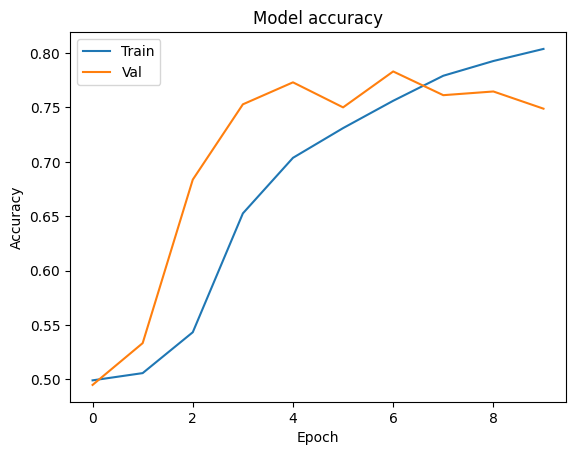

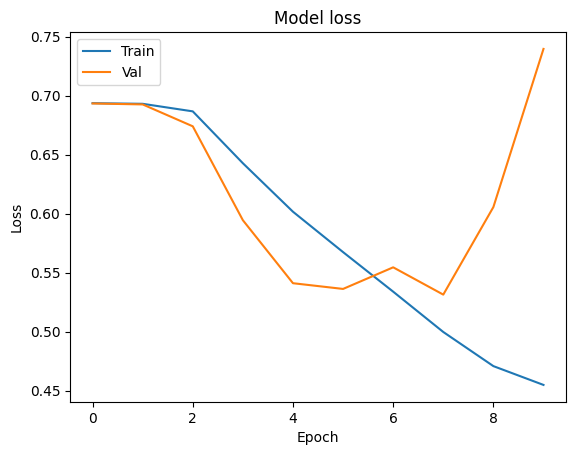

In [24]:
plot_history(history)

In [25]:
test_loss, test_acc = simple_lstm_model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

782/782 [==============================] - 2s 2ms/step - loss: 0.7179 - acc: 0.7642
Test accuracy: 0.764, Test loss: 0.718


##### Try to build a new model where you stack several recurrent layers.

In [47]:
# Build the model. It should be made by at least:
# 1 Embedding layer
# More than 1 SimpleRNN layer, do not forget to put the return_sequences parameter to True 
# 1 Dense layer
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Embedding(max_features, 16))
lstm_model.add(tf.keras.layers.SimpleRNN(16, return_sequences=True))
lstm_model.add(tf.keras.layers.SimpleRNN(16, return_sequences=True))
lstm_model.add(tf.keras.layers.SimpleRNN(16, return_sequences=False)) # return_sequences=False for mismatch in dimensions
lstm_model.add(tf.keras.layers.Dense(16, activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.6))
lstm_model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [48]:
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          160000    
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, None, 16)          528       
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, None, 16)          528       
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 2)                

In [49]:
#compile the model
lstm_model.compile(optimizer='rmsprop', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'])

In [50]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=2)
history = lstm_model.fit(x_train, y_train_encoded, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


157/157 [==============================] - 5s 20ms/step - loss: 0.6959 - acc: 0.5075 - val_loss: 0.6911 - val_acc: 0.5240
Epoch 2/10
157/157 [==============================] - 3s 17ms/step - loss: 0.6845 - acc: 0.5515 - val_loss: 0.6647 - val_acc: 0.5936
Epoch 3/10
157/157 [==============================] - 3s 17ms/step - loss: 0.5636 - acc: 0.7237 - val_loss: 0.4652 - val_acc: 0.7908
Epoch 4/10
157/157 [==============================] - 3s 16ms/step - loss: 0.4294 - acc: 0.8137 - val_loss: 0.4731 - val_acc: 0.7752
Epoch 5/10
157/157 [==============================] - 3s 17ms/step - loss: 0.3546 - acc: 0.8564 - val_loss: 0.4539 - val_acc: 0.7900
Epoch 6/10
157/157 [==============================] - 3s 17ms/step - loss: 0.2879 - acc: 0.8870 - val_loss: 0.5814 - val_acc: 0.7712
Epoch 7/10
157/157 [==============================] - 3s 17ms/step - loss: 0.2281 - acc: 0.9277 - val_loss: 0.6045 - val_acc: 0.7564
Epoch 8/10
157/157 [==============================] - 3s 18ms/step - loss: 0.166

In [51]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [52]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [55]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

# Build the model called transformer_model. It should be made by at least:
# 1 TokenAndPositionEmbedding layer with maxlen, vocab_size and embed_dim as arguments (we created them above!)
# 1 TransformerBlock layer with embed_dim, num_heads and ff_dim as arguments
# 1 GlobalAveragePooling1D layer
# 2 Dense layers 
tranformer_model = tf.keras.Sequential()
tranformer_model.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
tranformer_model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
tranformer_model.add(tf.keras.layers.GlobalAveragePooling1D())  
tranformer_model.add(tf.keras.layers.Dropout(0.4))
tranformer_model.add(tf.keras.layers.Dense(20, activation='relu'))
tranformer_model.add(tf.keras.layers.Dropout(0.4))
tranformer_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
tranformer_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'])



In [56]:
# Train the model
history = tranformer_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 96ms/step - loss: 0.5808 - acc: 0.6716 - val_loss: 0.4287 - val_acc: 0.8000
Epoch 2/10
157/157 [==============================] - 14s 89ms/step - loss: 0.3790 - acc: 0.8429 - val_loss: 0.4278 - val_acc: 0.8000
Epoch 3/10
157/157 [==============================] - 15s 93ms/step - loss: 0.3123 - acc: 0.8813 - val_loss: 0.4647 - val_acc: 0.7932
Epoch 4/10
157/157 [==============================] - 14s 87ms/step - loss: 0.2686 - acc: 0.8962 - val_loss: 0.5230 - val_acc: 0.7790
Epoch 5/10
157/157 [==============================] - 15s 94ms/step - loss: 0.2396 - acc: 0.9122 - val_loss: 0.4972 - val_acc: 0.7838
Epoch 6/10
157/157 [==============================] - 17s 107ms/step - loss: 0.2140 - acc: 0.9172 - val_loss: 0.6500 - val_acc: 0.7706
Epoch 7/10
157/157 [==============================] - 15s 94ms/step - loss: 0.1877 - acc: 0.9297 - val_loss: 0.6712 - val_acc: 0.7778
Epoch 8/10
157/157 [==============================] - 15s 94m

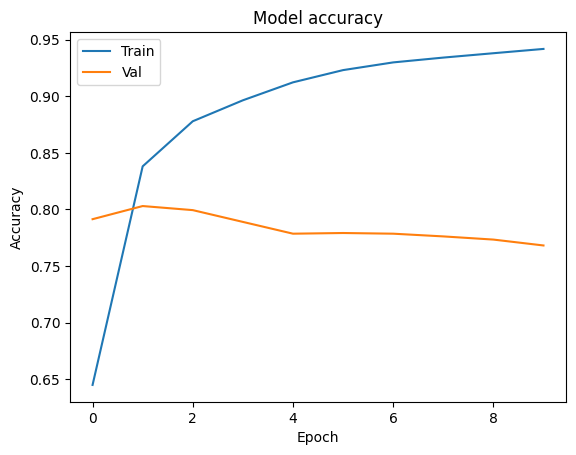

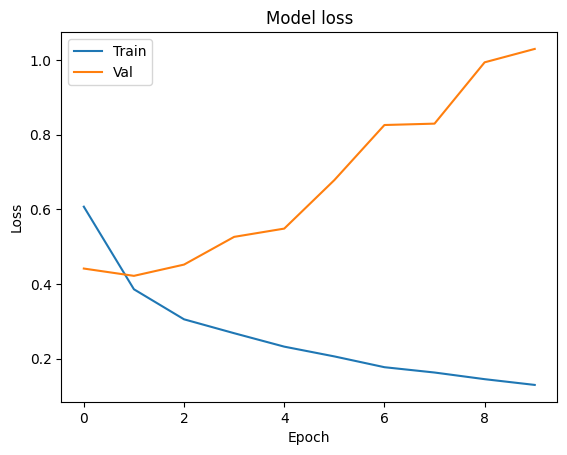

In [ ]:
plot_history(history)

In [ ]:
test_loss, test_acc = tranformer_model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

# 4.3 Transformers
<img src="https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1-768x1082.png" width="250px" align="right"><br>

One main drawback about RNNs is their capacity to remember long-term dependencies. To alleviate this problem different models have been proposed, like Long Short Term Memories (LSTM) and Transformers.<br>
*Transformers* is one of the best available model nowadays to deal with different kind of data (text, images..) and obtain state of the art results.

The key component in the Transformer architecture is the Attention layer, that helps the encoder look at other words in the input sentence as it encodes a specific word. The attention mechanism, in theory, and given enough compute resources, have a wider window to reference from, therefore being capable of using the **entire context** of the text.




In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

# Build the model called transformer_model. It should be made by at least:
# 1 TokenAndPositionEmbedding layer with maxlen, vocab_size and embed_dim as arguments (we created them above!)
# 1 TransformerBlock layer with embed_dim, num_heads and ff_dim as arguments
# 1 GlobalAveragePooling1D layer
# 2 Dense layers 

tranformer_model = tf.keras.Sequential()
tranformer_model.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
tranformer_model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
tranformer_model.add(tf.keras.layers.GlobalAveragePooling1D())
tranformer_model.add(tf.keras.layers.Dropout(0.2))
tranformer_model.add(tf.keras.layers.Dense(20, activation='relu'))
tranformer_model.add(tf.keras.layers.Dropout(0.4))
tranformer_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
tranformer_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'])

In [ ]:
# Train the model
history = tranformer_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
plot_history(history)

In [ ]:
# Evaluate the model
test_loss, test_acc = tranformer_model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

# Reuters newswire classification dataset

The reuters newswire classification dataset is a dataset of 11,228 newswires from Reuters, labeled over 46 topics. More information about the dataset and how to use it can be found here:
https://keras.io/api/datasets/reuters/

Try to build a new model dealing with this new dataset.
Try to use both the RNN and the Transfomrers approach, and select the best of them. What do you expect will be the best? Be carefull that this domain shift will imply some changes in your code as it is not a binary classification problem anymore!

In [ ]:
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=max_features)

num_classes = np.max(y_train) + 1
print(num_classes)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Building a model using SparseCategoricalCrossentropy

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 16))
model.add(tf.keras.layers.SimpleRNN(16))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
plot_history(history)

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))